# Dependencies and files

## Imports

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import gseapy
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Global variables

## Load files

### Load pseudobulks

In [45]:
adata_pb = sc.read_h5ad('../../data/snRNAseq_data/velm_pb_mean_ver2.h5ad')
#adata_pb = adata_pb[(adata_pb.obs.diagnosis == "Control")]
adata_pb = adata_pb[(adata_pb.obs.region_broad == "FC") & (adata_pb.obs.age_range.isin(['3rd trimester', '2nd trimester', '0-1 years'])) & (adata_pb.obs.lineage != 'OUT')]
adata_pb.obs.lineage.value_counts()

lineage
ExNeu        55
IN           55
OPC          55
VASC         55
AST          54
MG           54
GLIALPROG    44
OL           11
Name: count, dtype: int64

In [36]:
adata_pb.obs.region.value_counts()

region
Frontoparietal cortex    240
BA9                      108
PFC                       53
FC                        17
BA9/46                     8
BA8                        7
Name: count, dtype: int64

In [37]:
adata_pb.obs.dataset.value_counts()

dataset
Ramos        240
Velmeshev    125
Herring       68
Name: count, dtype: int64

In [27]:
adata_pb.var

Empty DataFrameView
Columns: []
Index: [A1BG, A1BG-AS1, A1CF, A2M, A2M-AS1, A2ML1, A2ML1-AS1, A3GALT2, A4GALT, A4GNT, AAAS, AACS, AADAC, AADACL2, AADACL3, AADACL4, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARD, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, ABAT, ABCA1, ABCA10, ABCA12, ABCA13, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCA9-AS1, ABCB1, ABCB10, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC2, ABCC3, ABCC4, ABCC5, ABCC5-AS1, ABCC6, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ABHD12, ABHD12B, ABHD13, ABHD14A, ABHD14B, ABHD15, ABHD16A, ABHD16B, ABHD17A, ABHD17B, ABHD17C, ABHD2, ABHD3, ABHD4, ABHD5, ABHD6, ...]

[19731 rows x 0 columns]

In [3]:
# annot = sc.queries.biomart_annotations("hsapiens", ["ensembl_gene_id", "start_position", "end_position", "chromosome_name", "gene_biotype"])
# adata_pb.var.columns = ['ensembl_gene_id']
# new_var = adata_pb.var.reset_index().set_index('ensembl_gene_id').merge(annot.set_index('ensembl_gene_id'), left_index=True, right_index=True).reset_index().set_index('index')
# adata_pb = adata_pb[:, new_var.index]
# adata_pb.var = new_var
# adata_pb

AnnData object with n_obs × n_vars = 321 × 39965
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [4]:
# adata_pb = adata_pb[:, adata_pb.var.gene_biotype == 'protein_coding']
# adata_pb

View of AnnData object with n_obs × n_vars = 321 × 18233
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [46]:
expression = pd.DataFrame(adata_pb.X, index=adata_pb.obs_names, columns=adata_pb.var_names)
expression.T.to_csv('results/celltype_expression.csv')
adata_pb.obs.to_csv('results/celltype_annotation.csv')

## Load snRNA-Seq

In [3]:
adata_velm = sc.read_h5ad('../../data/snRNAseq_data/adata_velm_umap_ver2.h5ad')
#adata_velm = adata_velm[(adata_velm.obs.diagnosis == "Control")]
adata_velm

AnnData object with n_obs × n_vars = 319893 × 20116
    obs: 'dataset', 'sample', 'individual', 'region', 'age', 'age(days)', 'age_range', 'sex_original', 'region_broad', 'chemistry', 'PMI', 'sex', 'seurat_clusters', 'lineage'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'age_range_colors', 'dataset_colors', 'hvg', 'individual_colors', 'lineage_colors', 'log1p', 'neighbors', 'pca', 'region_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Preprocess snRNA-Seq

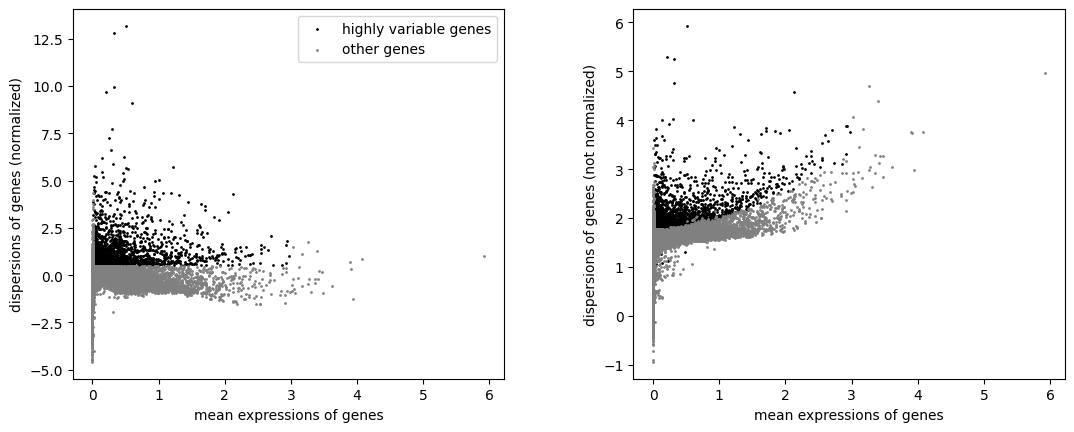

In [4]:
sc.pl.highly_variable_genes(adata_velm)

In [5]:
sc.pp.neighbors(adata_velm)
sc.tl.pca(adata_velm)
sc.tl.umap(adata_velm)

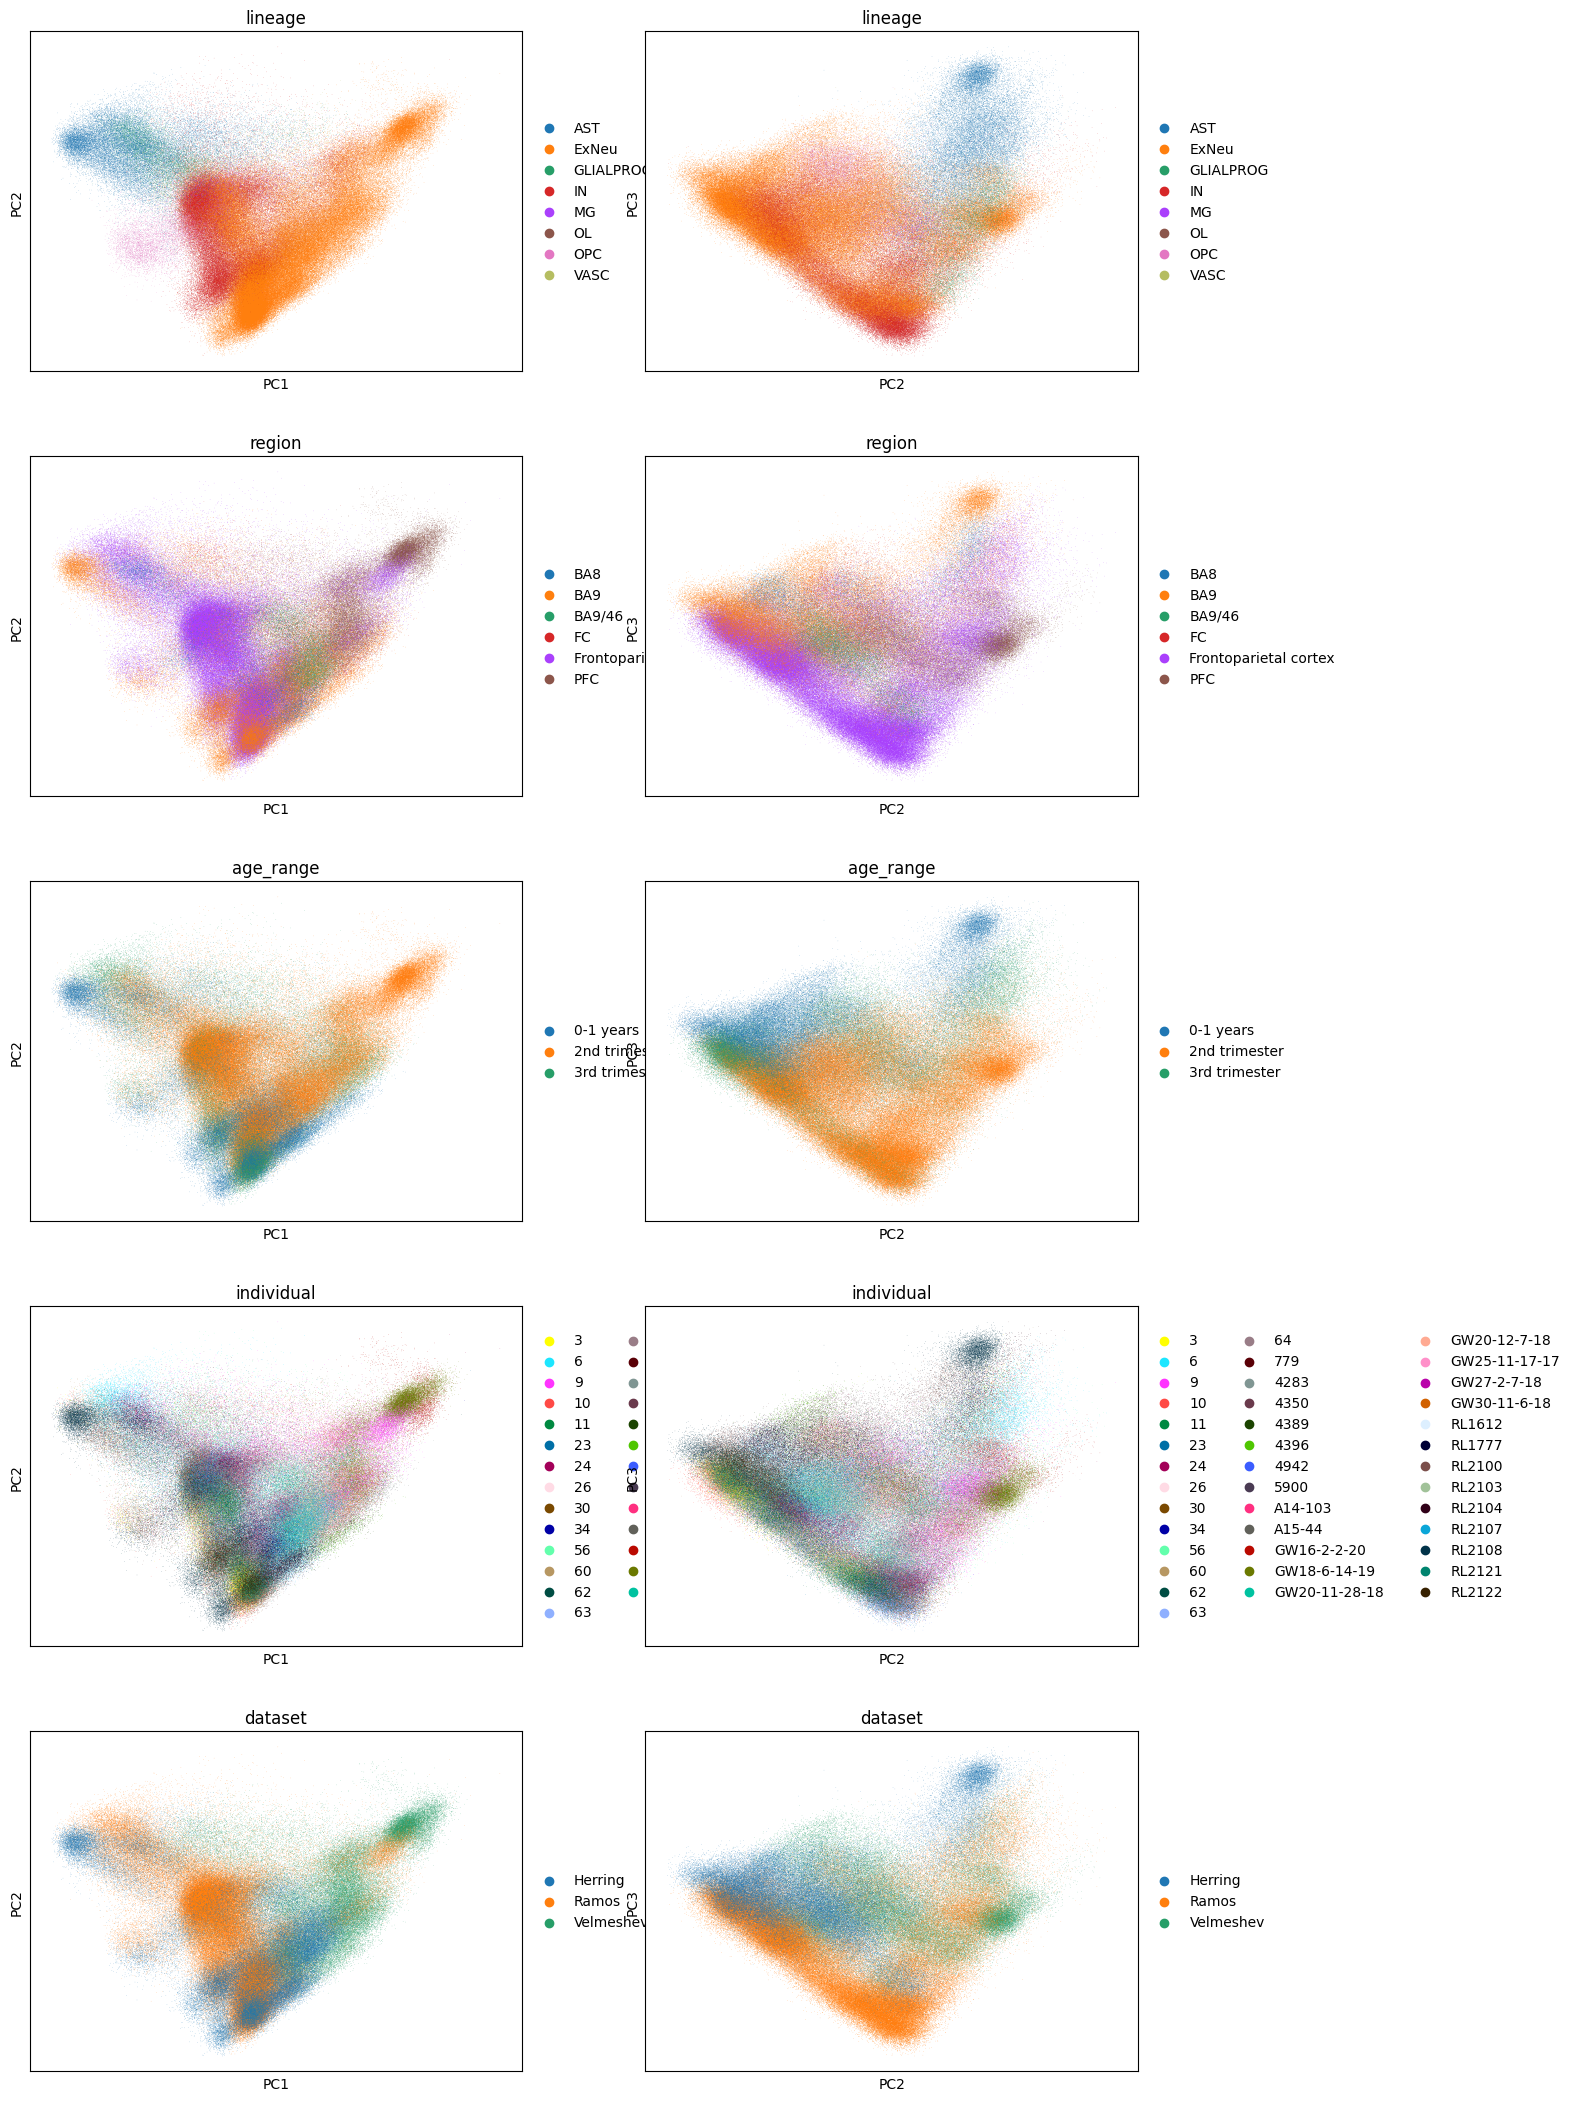

In [7]:
sc.pl.pca(adata_velm, color=['lineage', 'region', 'age_range', 'individual', 'dataset'], components=['1,2', '2,3'], ncols=2)

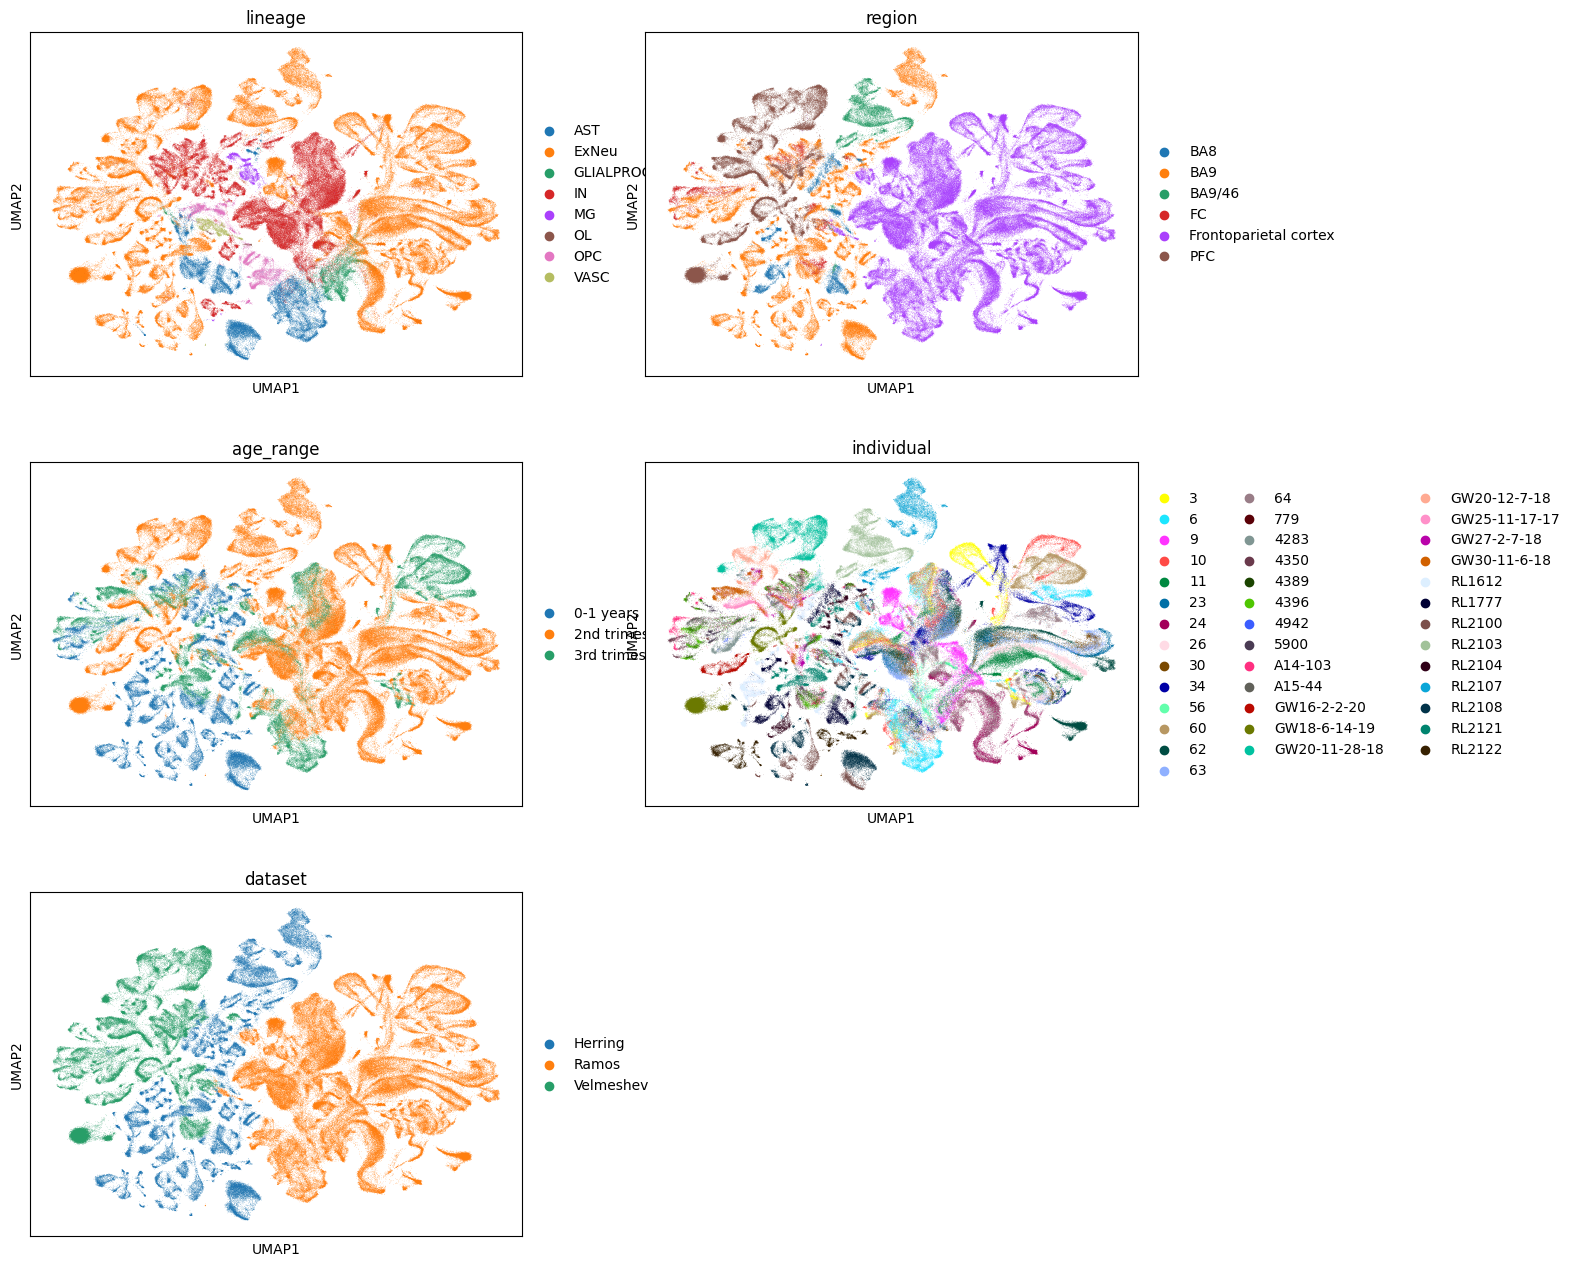

In [8]:
sc.pl.umap(adata_velm, color=['lineage', 'region', 'age_range', 'individual', 'dataset'], ncols=2)

In [9]:
adata_velm.write_h5ad("results/adata_velm_umap_ver2.h5ad")

# Preprocess

## Filter

In [47]:
sc.pp.filter_genes(adata_pb, min_counts=10)
sc.pp.filter_genes(adata_pb, min_cells=10)

c:\projects\spatialMPFC\venv\Lib\site-packages\scanpy\preprocessing\_simple.py:273: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_counts"] = number


In [48]:
adata_pb

AnnData object with n_obs × n_vars = 383 × 11592
    obs: 'dataset', 'sample', 'individual', 'region', 'age', 'age(days)', 'age_range', 'sex_original', 'region_broad', 'chemistry', 'PMI', 'sex', 'lineage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'n_counts', 'n_cells'
    layers: 'psbulk_props'

## Normalize

In [49]:
sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)

Highly variable genes: 2300


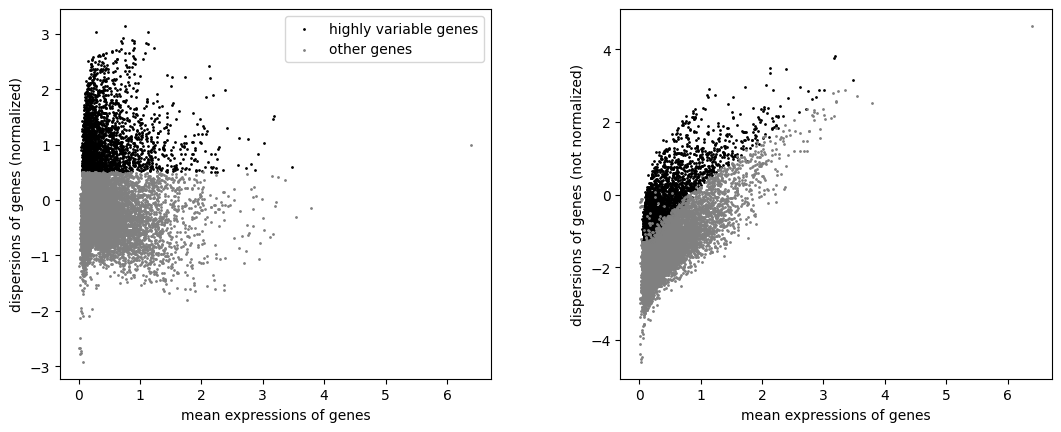

In [50]:
sc.pp.highly_variable_genes(adata_pb, batch_key='region', max_mean=5)
print("Highly variable genes: %d"%sum(adata_pb.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata_pb)

## Visualize

In [51]:
sc.tl.pca(adata_pb)

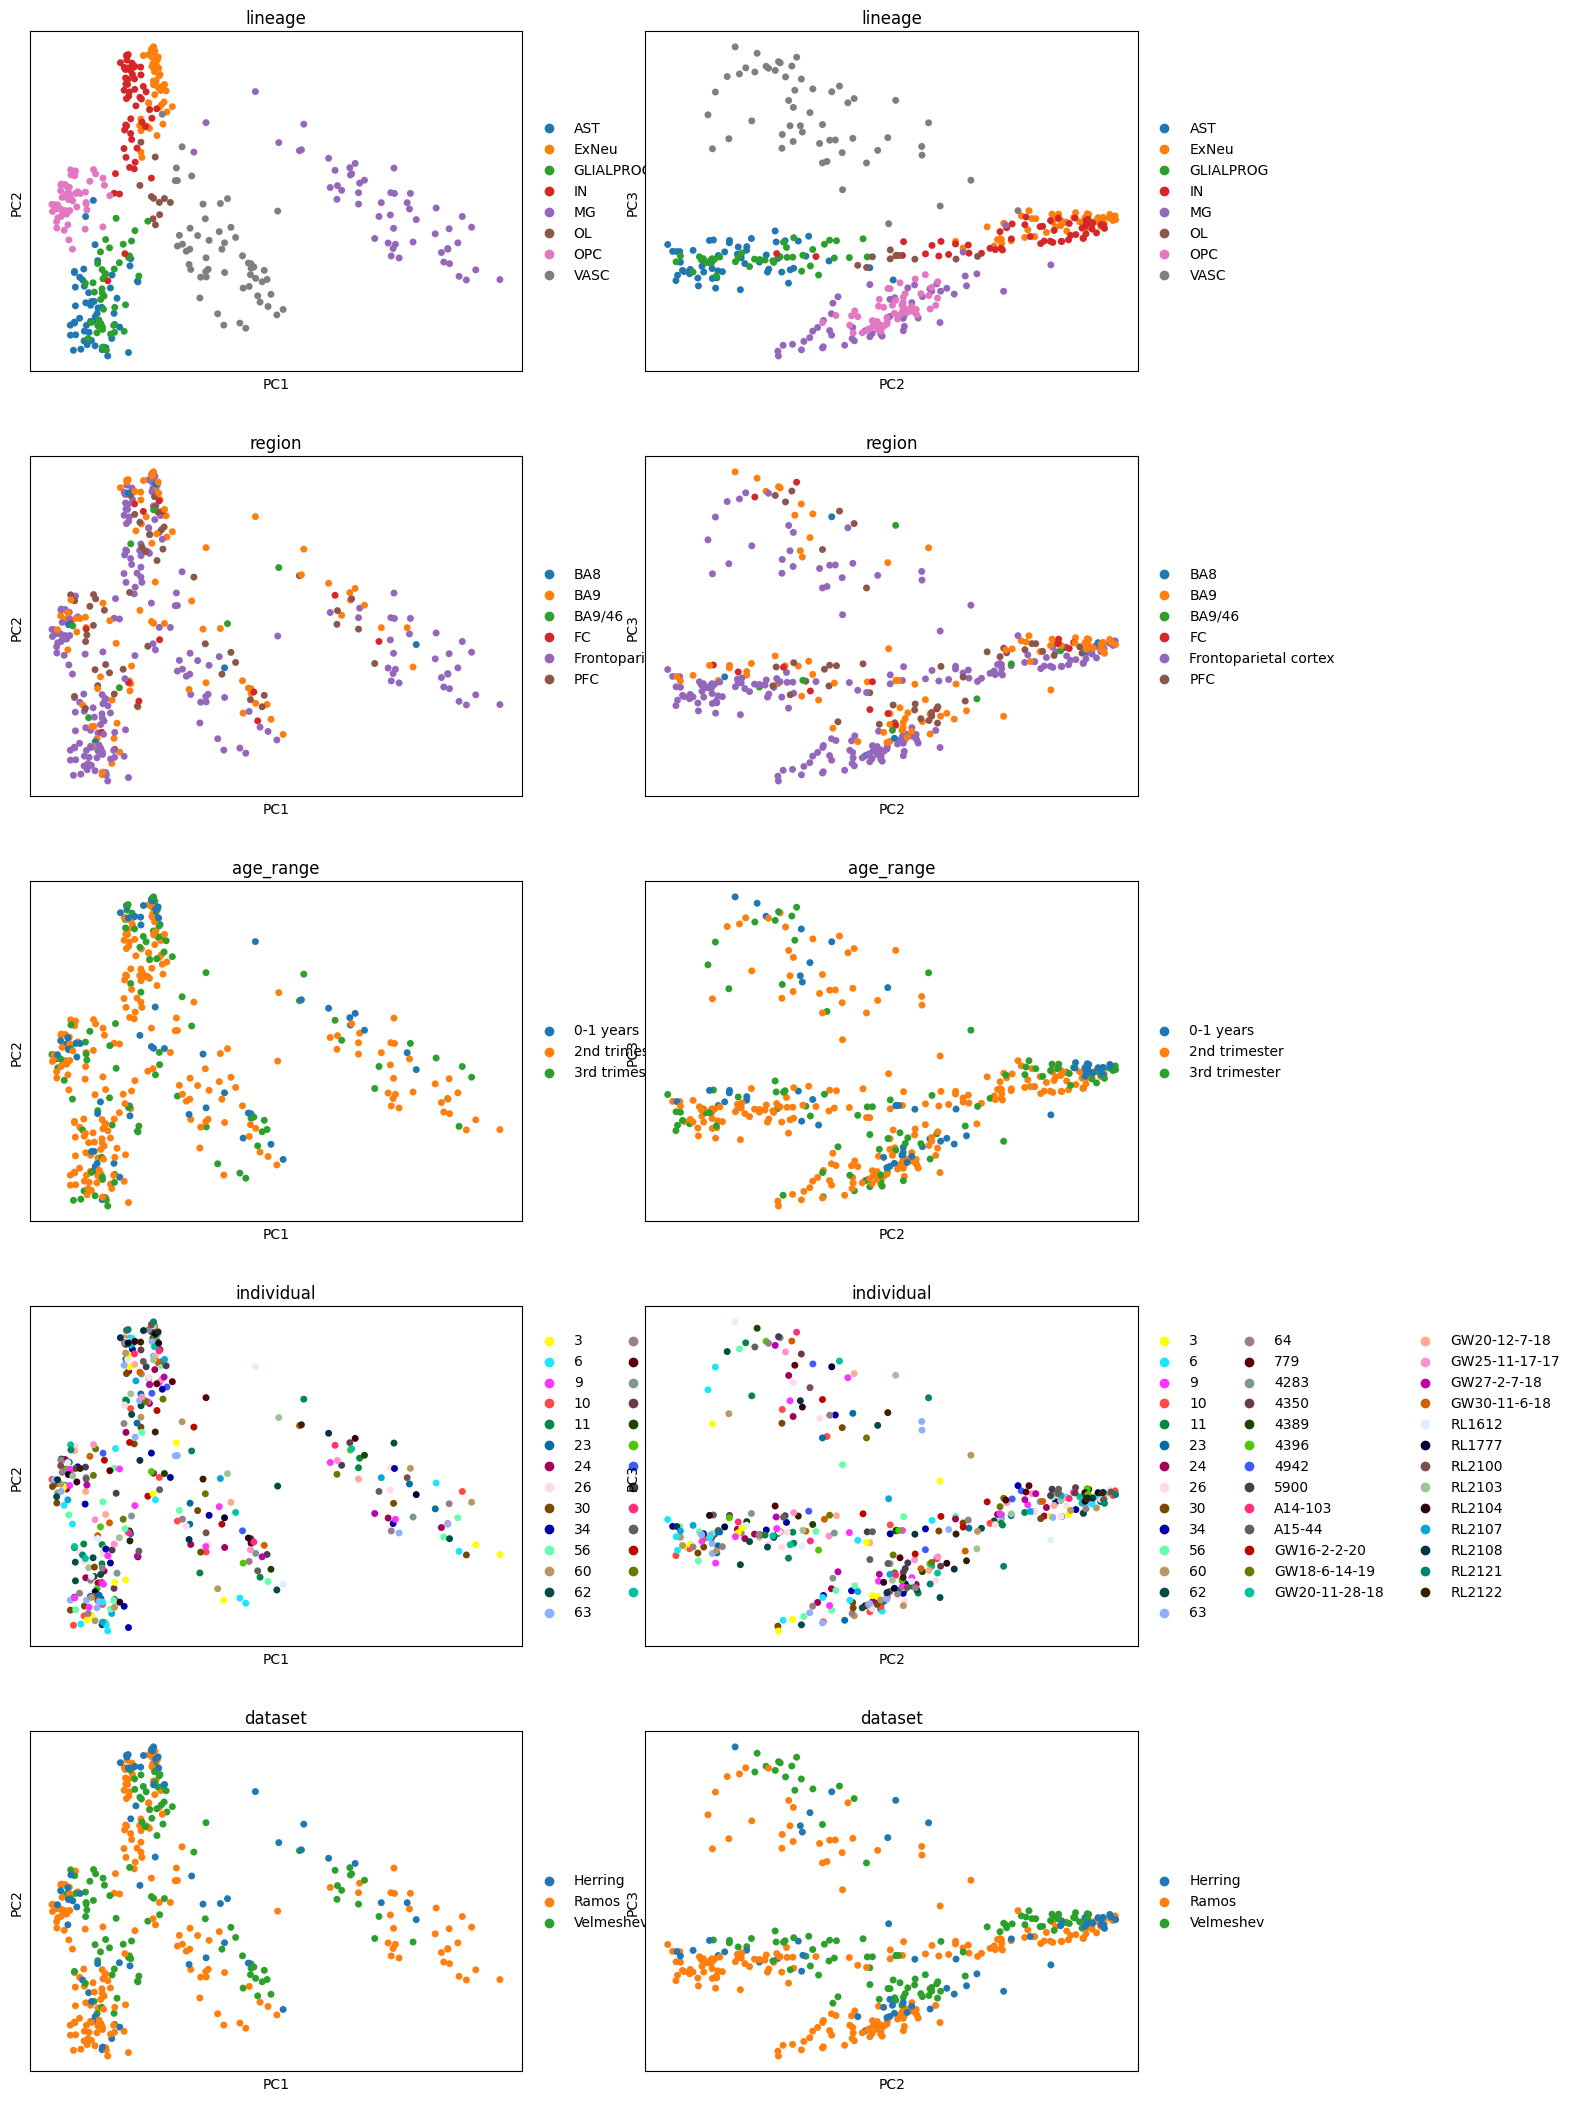

In [58]:
sc.pl.pca(adata_pb, color=['lineage', 'region', 'age_range', 'individual', 'dataset'], size=100, components=['1,2', '2,3'], ncols=2)

In [54]:
sc.pp.neighbors(adata_pb)
sc.tl.umap(adata_pb)

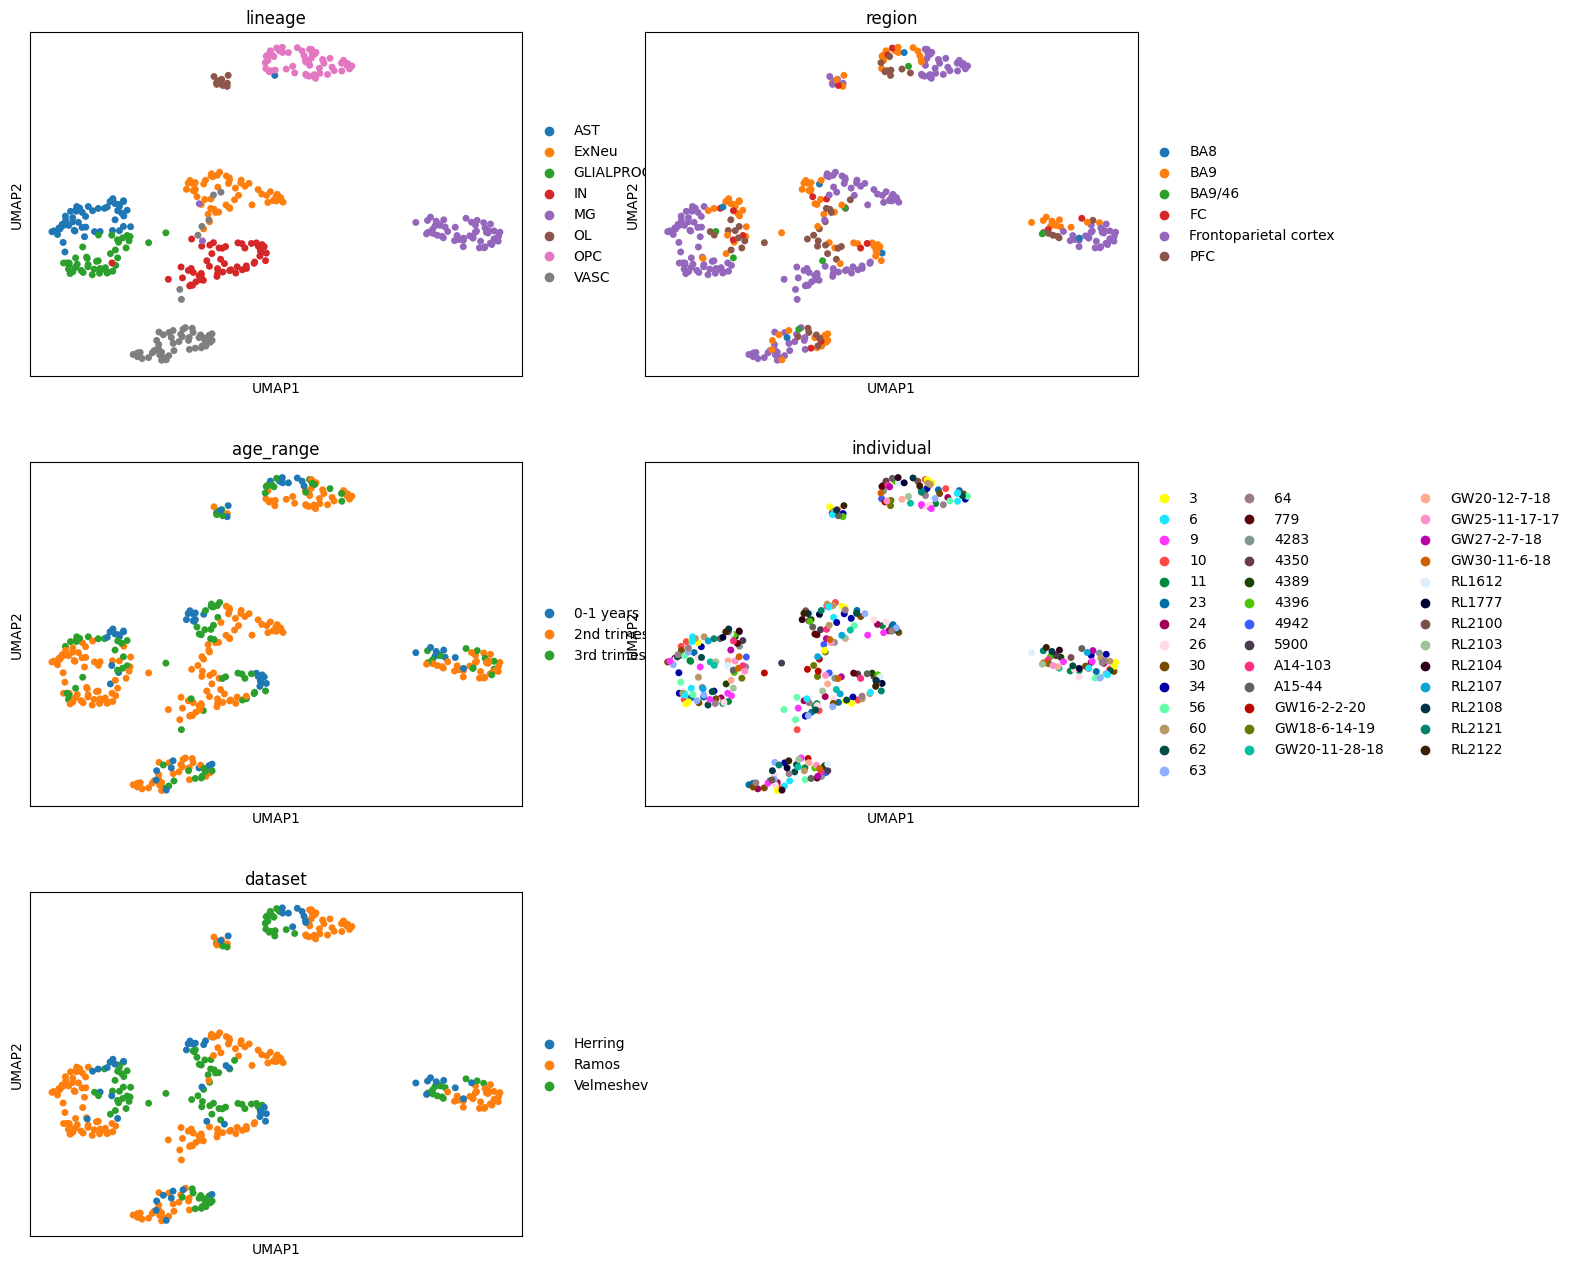

In [57]:
sc.pl.umap(adata_pb, color=['lineage', 'region', 'age_range', 'individual', 'dataset'], size=100, ncols=2)

# Rank genes

## T-test

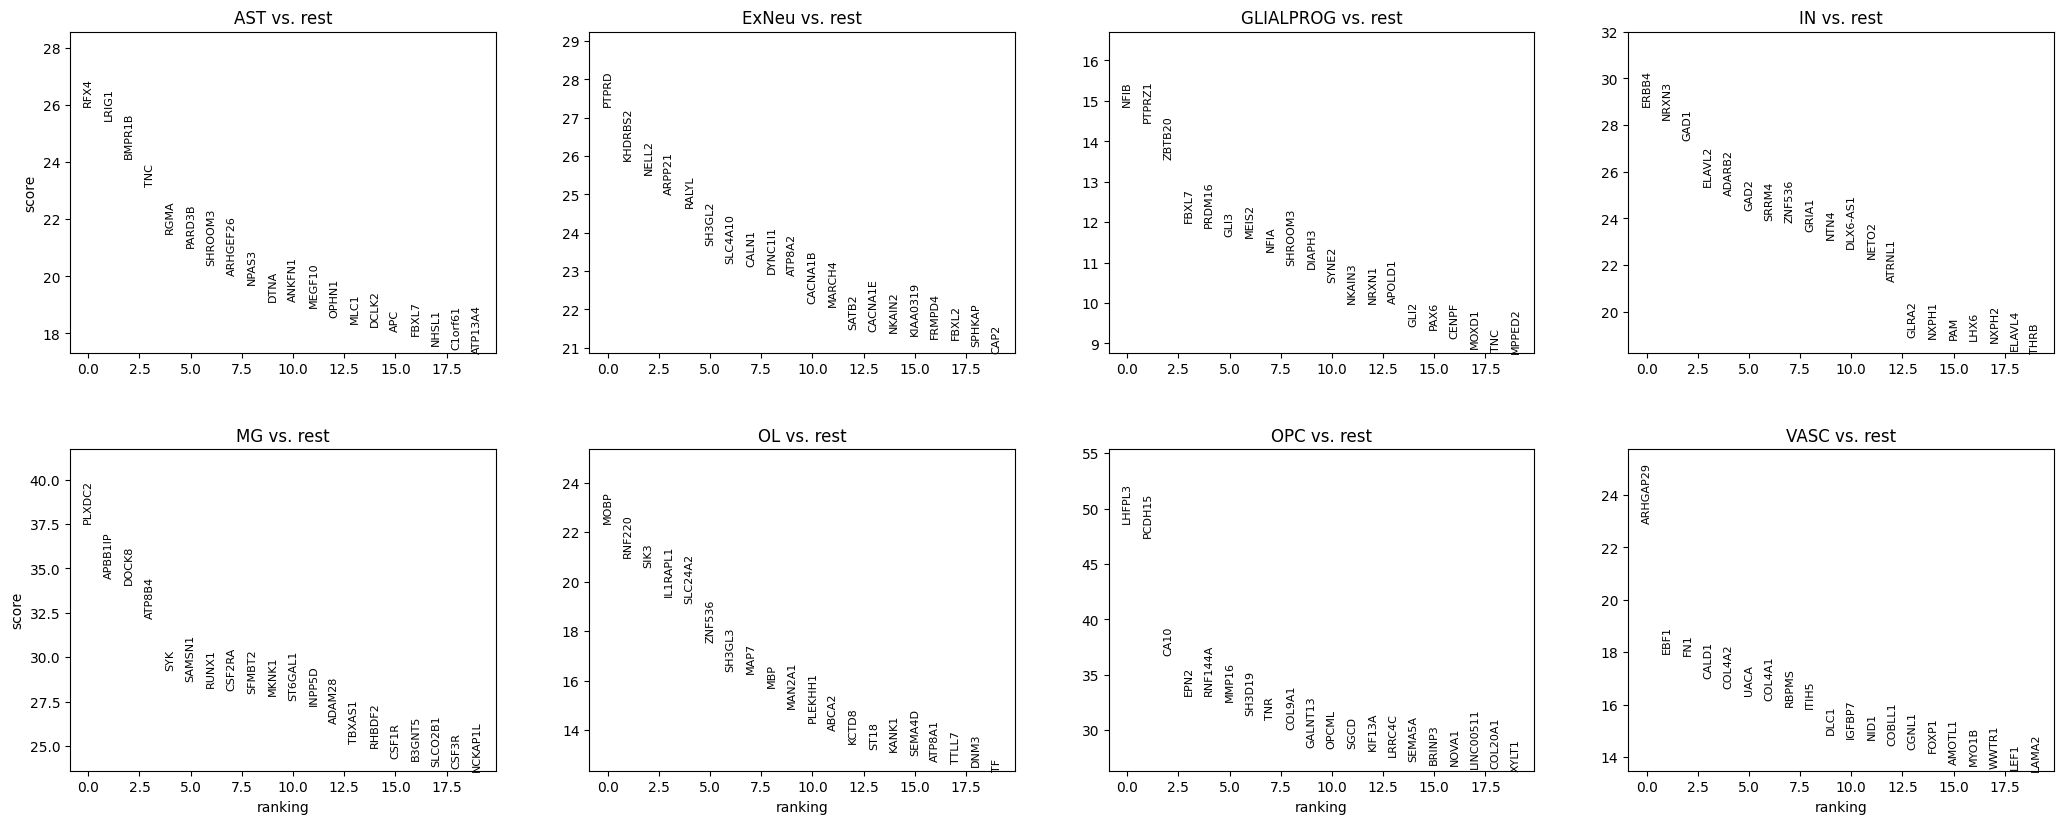

In [59]:
sc.tl.rank_genes_groups(adata_pb, 'lineage', method='t-test', reference='rest', key_added="t-test", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="t-test")

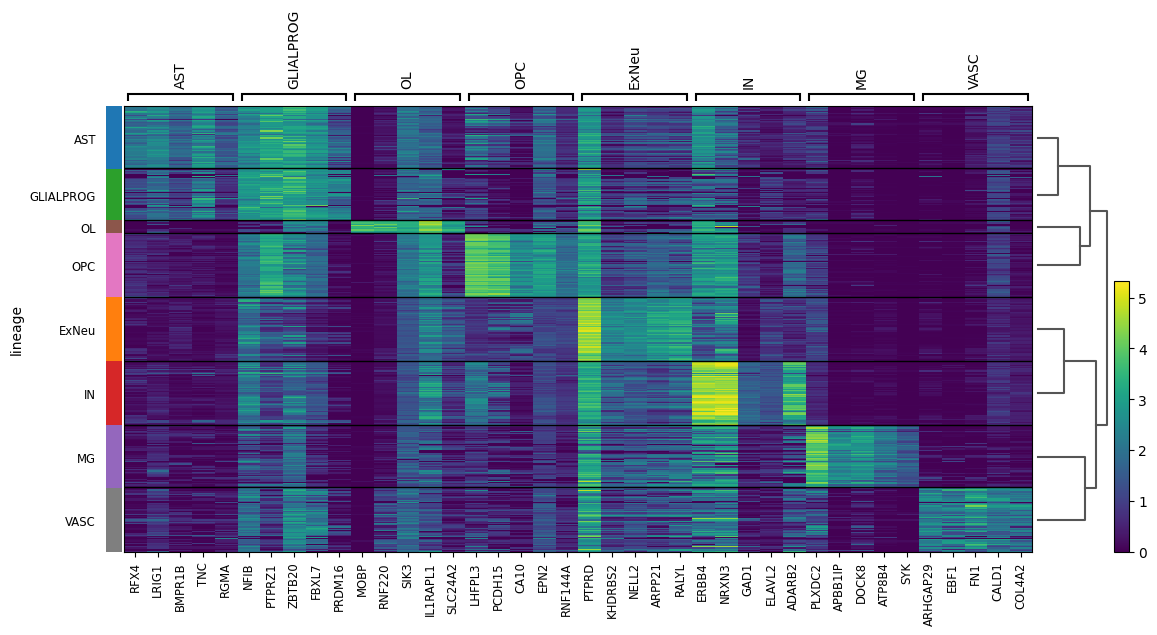

In [60]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="t-test", groupby="lineage", show_gene_labels=True)

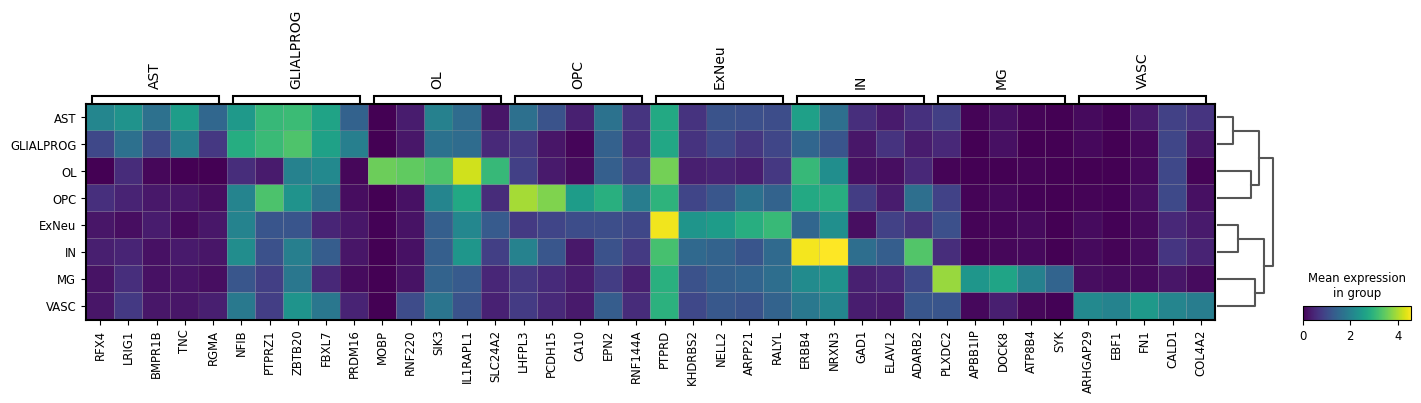

In [61]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="lineage")

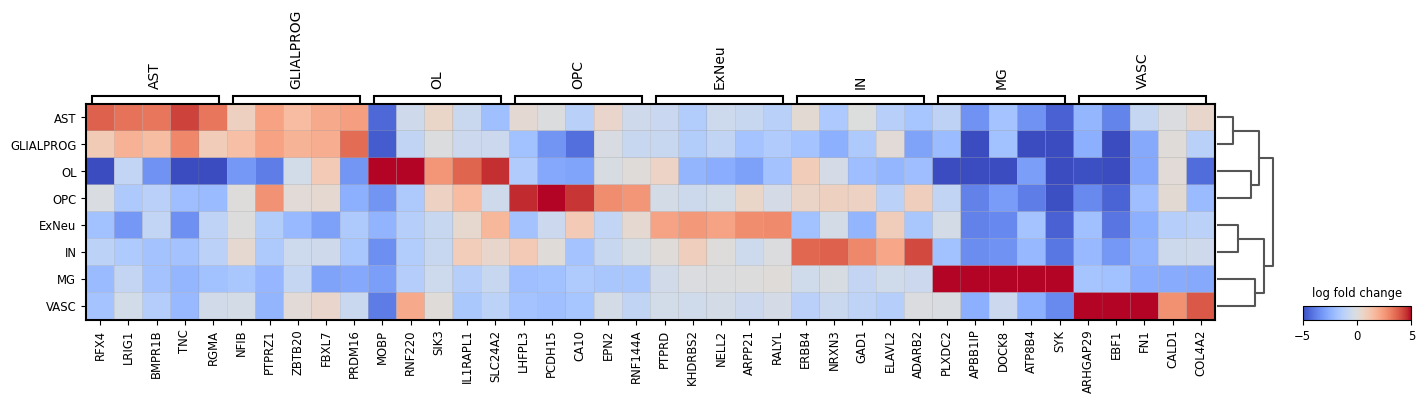

In [62]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="lineage", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Wilcoxon

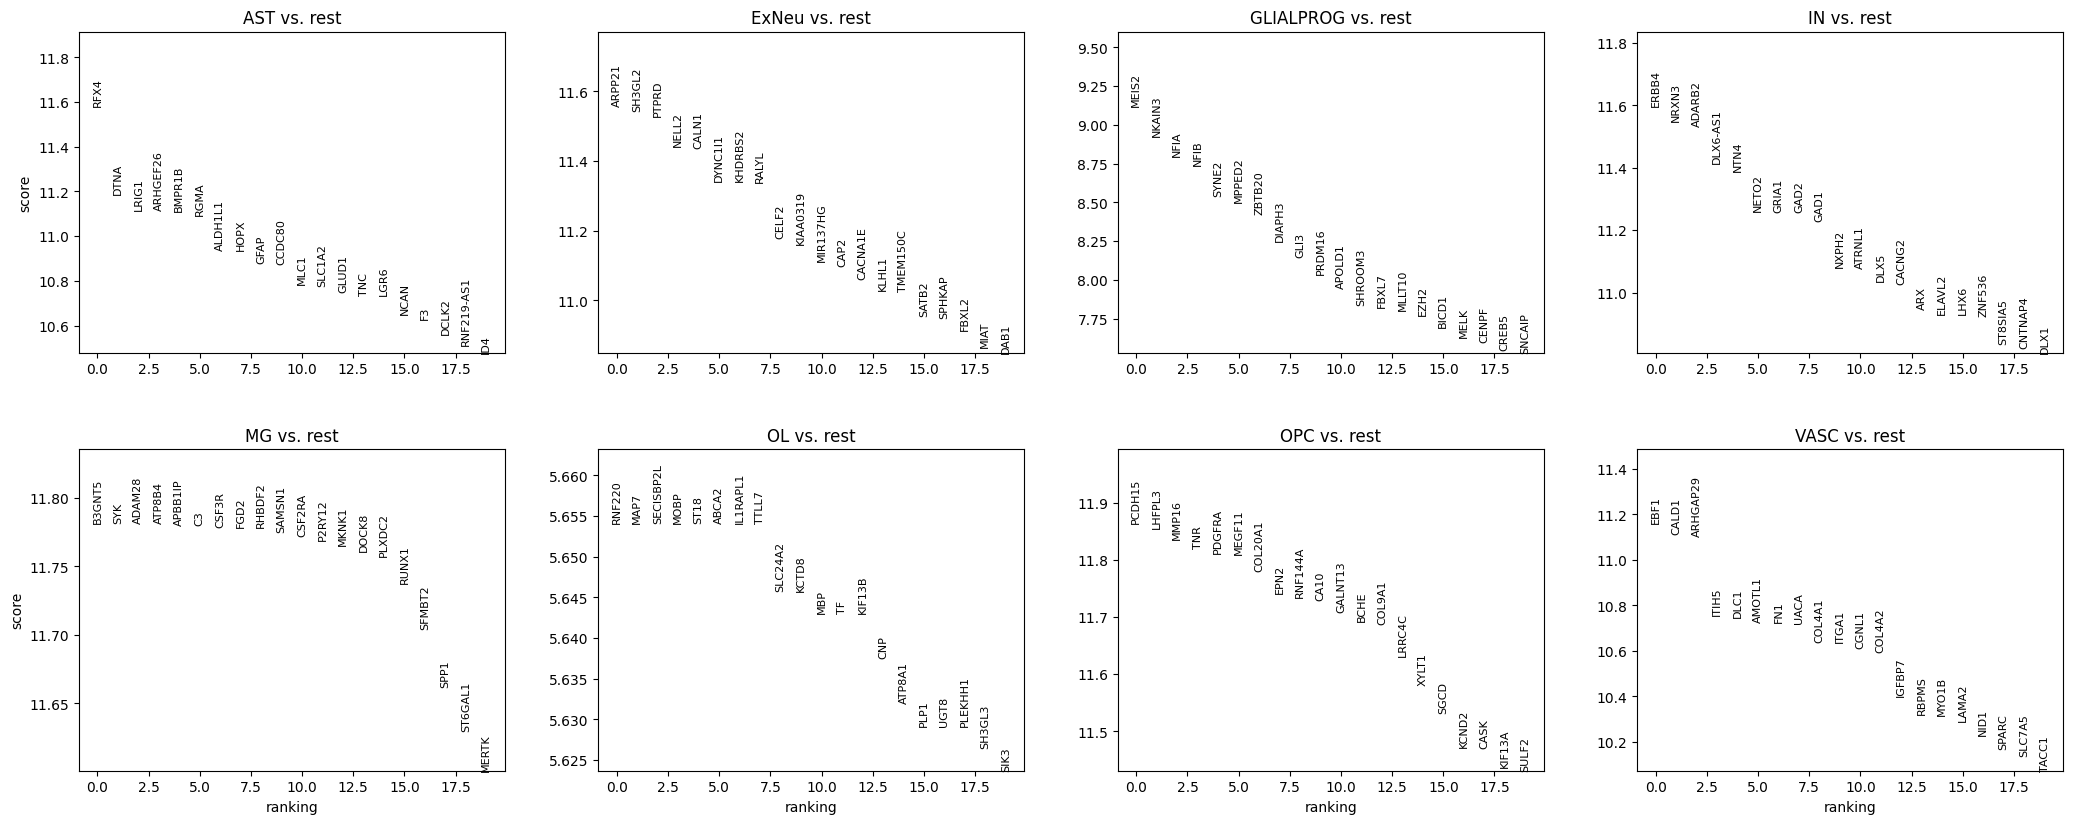

In [63]:
sc.tl.rank_genes_groups(adata_pb, 'lineage', method='wilcoxon', reference='rest', key_added="wilcoxon", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="wilcoxon")

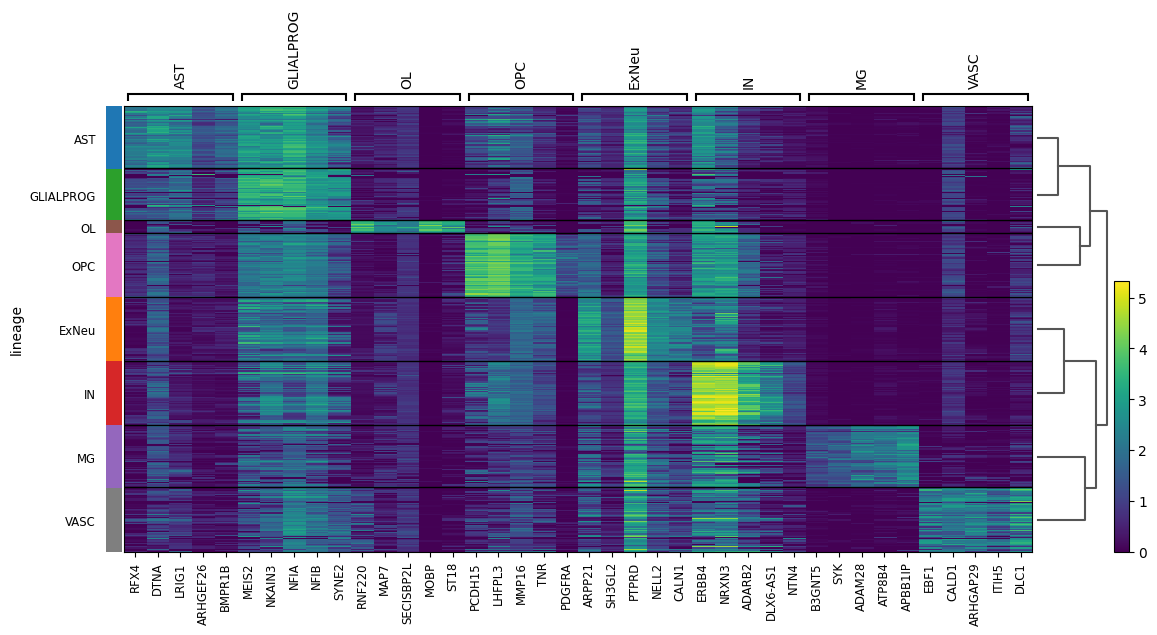

In [64]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="wilcoxon", groupby="lineage", show_gene_labels=True)

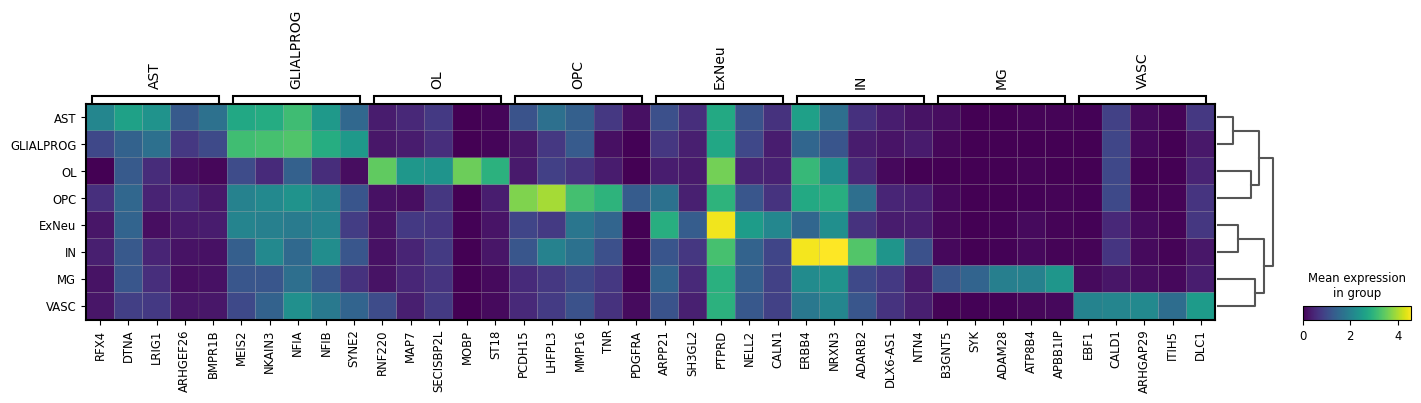

In [65]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="lineage")

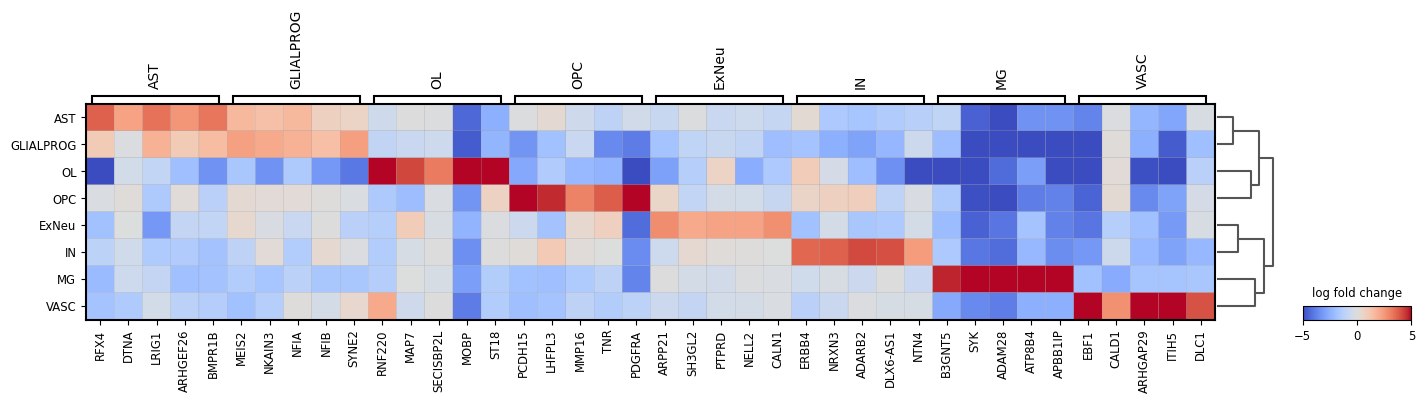

In [66]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="lineage", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Logreg

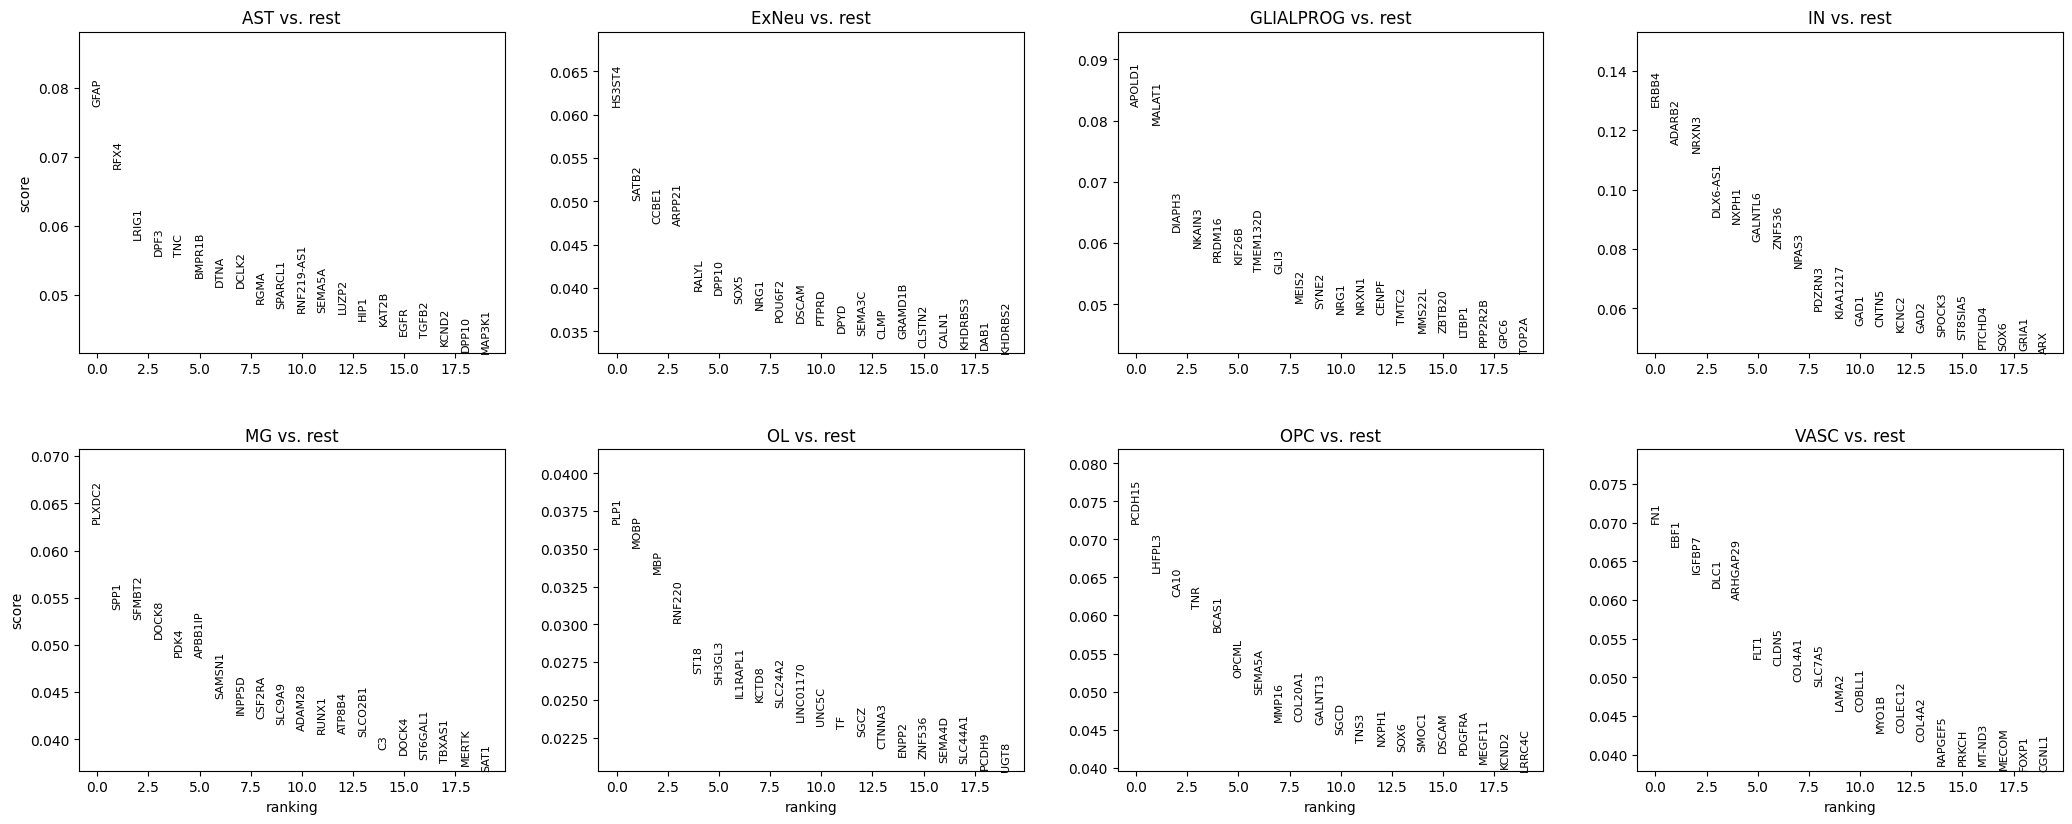

In [67]:
sc.tl.rank_genes_groups(adata_pb, 'lineage', method='logreg', reference='rest', key_added="logreg", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="logreg")

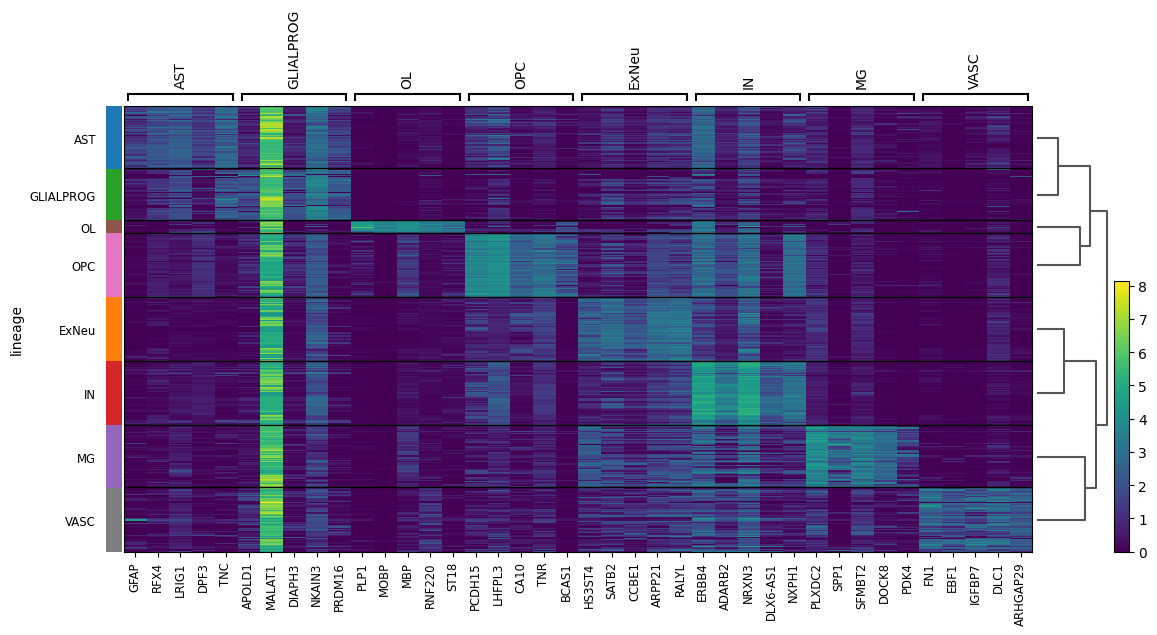

In [68]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="logreg", groupby="lineage", show_gene_labels=True)

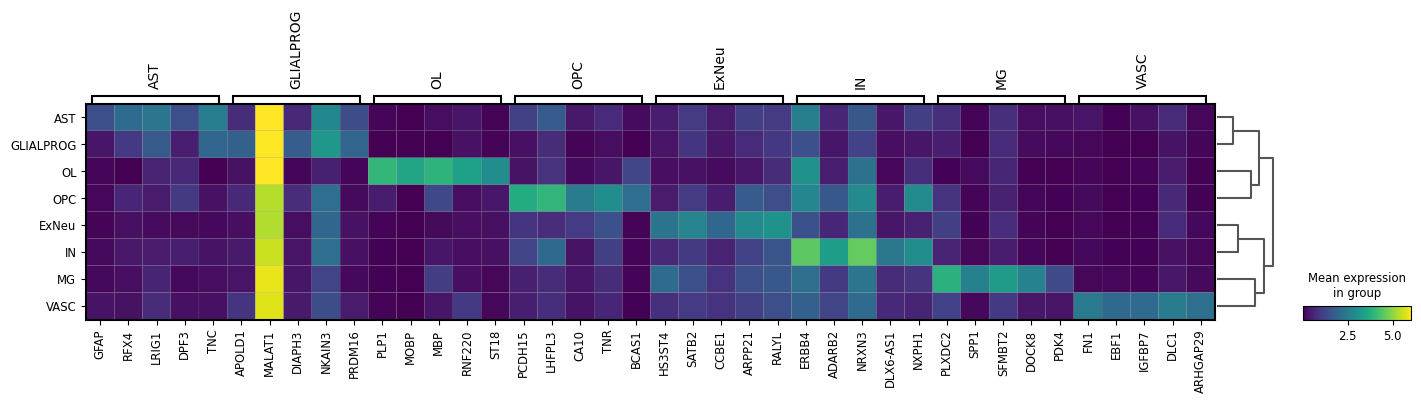

In [69]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="logreg", groupby="lineage")

### Save results

In [70]:
adata_pb.write_h5ad("results/pb_adata_diffexpr.h5ad")